In [2]:
import zipfile
import os

base_dir = os.getenv('HOME') + '/aiffel/aiffel_quest/rock_scissor_paper_240306/'

# 압축 파일 경로
zip_file = base_dir + "r_s_p.zip"
# 압축 해제할 폴더 경로
extract_to_folder = base_dir + "data"

# data 폴더가 없다면 생성
os.makedirs(extract_to_folder, exist_ok=True)

# zipfile 모듈을 사용하여 압축 해제
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_to_folder)

print("압축 해제가 완료되었습니다.")

압축 해제가 완료되었습니다.


In [3]:
from PIL import Image
import glob
import os

print('PIL 라이브러리 import 완료!')

PIL 라이브러리 import 완료!


가위 버전을 두가지 버전으로 촬영을 해서 하나로 합침

In [4]:
# 지금은 필요없음
# import os

# def move_and_rename_images(source_folder, dest_folder):
#     # scissor2 폴더 내의 모든 파일 가져오기
#     images_folder2 = [os.path.join(source_folder, img) for img in os.listdir(source_folder) if img.endswith('.jpg')]
    
#     # scissor2 폴더의 파일명 변경 및 scissor 폴더로 이동
#     for idx, img_path in enumerate(images_folder2):
#         # 파일명 변경
#         new_img_path = os.path.join(source_folder, f"scissor2_{idx}.jpg")
#         os.rename(img_path, new_img_path)
#         # scissor 폴더로 이동
#         dest_img_path = os.path.join(dest_folder, f"scissor2_{idx}.jpg")
#         os.rename(new_img_path, dest_img_path)

# # scissor2 폴더와 scissor 폴더의 경로
# source_folder = base_dir + "scissor2"
# dest_folder = base_dir + "scissor"

# # 이미지 파일 이동 및 파일명 변경
# move_and_rename_images(source_folder, dest_folder)


각 폴더에 있는 데이터 수를 확인해보자

In [5]:
def count_images_in_folders(root_folder):
    # 각 폴더의 이미지 파일 개수를 저장할 딕셔너리
    image_counts = {}
    
    # root_folder 내의 모든 폴더 탐색
    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)
        # 디렉토리인 경우에만 처리
        if os.path.isdir(folder_path):
            # 해당 폴더 내의 이미지 파일 개수 확인
            image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg')]
            image_counts[folder_name] = len(image_files)
    
    return image_counts

# 이미지가 있는 폴더의 경로
root_folder =base_dir + 'data'

# 각 폴더의 이미지 파일 개수 확인
image_counts = count_images_in_folders(root_folder)

# 결과 출력
for folder_name, count in image_counts.items():
    print(f"{folder_name} 폴더 내의 이미지 파일 개수:", count)


__MACOSX 폴더 내의 이미지 파일 개수: 0
.ipynb_checkpoints 폴더 내의 이미지 파일 개수: 0
scissor 폴더 내의 이미지 파일 개수: 1479
test 폴더 내의 이미지 파일 개수: 0
paper 폴더 내의 이미지 파일 개수: 981
rock 폴더 내의 이미지 파일 개수: 1044


scissor 를 합치다 보니 데이터 수가 많아졌다.<br>
각 데이터 숫자를 150개로 맞춰보자<br>
이미지를 랜덤하게 뽑아서 900개로 만들자

In [6]:
import random
import shutil

def move_random_images(source_folder, dest_folder, num_images):
    # 폴더가 없으면 생성
    os.makedirs(dest_folder, exist_ok=True)
    
    # 폴더 내의 이미지 파일들 리스트 가져오기
    image_files = [file for file in os.listdir(source_folder) if file.endswith('.jpg')]
    
    # 랜덤하게 이미지 파일 선택
    selected_images = random.sample(image_files, min(num_images, len(image_files)))
    
    # 이미지 파일을 목적지 폴더로 이동
    for image in selected_images:
        source_path = os.path.join(source_folder, image)
        dest_path = os.path.join(dest_folder, image)
        shutil.move(source_path, dest_path)

# 이미지가 있는 폴더의 경로
base_folder = base_dir + 'data'
folders = ["rock", "scissor", "paper"]

# 랜덤하게 선택할 이미지 개수
num_images = 900

# 각 폴더에 대해 이미지 이동
for folder in folders:
    source_folder = os.path.join(base_folder, folder)
    dest_folder = os.path.join(base_folder, "train", folder)
    move_random_images(source_folder, dest_folder, num_images)

print("이미지 이동 완료")

이미지 이동 완료


학습 레이블이 모두 비슷하게 만들어보았다.

In [7]:
import os
import glob
from PIL import Image

def resize_images(img_path):
    images = glob.glob(img_path + '/*.jpg')
    
    print(len(images), 'images to be resized.')
    
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), "images resized.")

# 이미지가 들어있는 폴더들을 반복하면서 이미지 크기를 변경합니다.
base_dir = os.path.expanduser("~") + "/aiffel/aiffel_quest/rock_scissor_paper_240306/data/train"
folders = ['rock', 'scissor', 'paper']

for folder in folders:
    image_dir_path = os.path.join(base_dir, folder)
    resize_images(image_dir_path)

print("이미지 resize 완료!")

900 images to be resized.
900 images resized.
900 images to be resized.
900 images resized.
900 images to be resized.
900 images resized.
이미지 resize 완료!


In [8]:
import numpy as np

def load_data(img_path, number_of_data=2700):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = base_dir
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2700 입니다.
x_train shape: (2700, 28, 28, 3)
y_train shape: (2700,)


라벨:  0


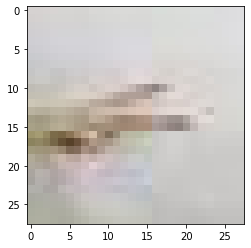

In [9]:
import matplotlib.pyplot as plt

plt.imshow(x_train[5])
print('라벨: ', y_train[5])

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


n_channel_1=32
n_channel_2=64
n_dense=10
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3))) # 컬러기 때문에 3으로 진행
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train_norm, y_train, epochs=n_train_epoch)
history

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                16010     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

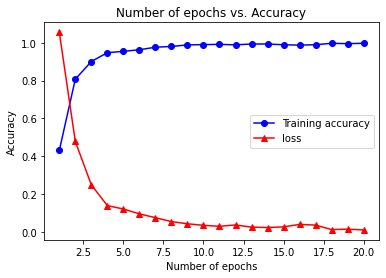

In [31]:
accuracy_train = history.history['accuracy']
accuracy_loss = history.history['loss']
epochs_ = range(1, n_train_epoch + 1)

# 정확도 그래프 플로팅
plt.plot(epochs_, accuracy_train, label='Training accuracy', color='blue', marker='o')
plt.plot(epochs_, accuracy_loss, label='loss', color='red', marker='^')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Number of epochs vs. Accuracy')
plt.legend()
plt.show()

In [14]:
base_dir = os.getenv('HOME') + '/aiffel/aiffel_quest/rock_scissor_paper_240306/'

# 압축 파일 경로
zip_file = base_dir + "Archive.zip"
# 압축 해제할 폴더 경로
extract_to_folder = base_dir + "data/test"

# data 폴더가 없다면 생성
os.makedirs(extract_to_folder, exist_ok=True)

# zipfile 모듈을 사용하여 압축 해제
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_to_folder)

print("압축 해제가 완료되었습니다.")

압축 해제가 완료되었습니다.


In [15]:
# 이미지가 들어있는 폴더들을 반복하면서 이미지 크기를 변경합니다.
base_dir = os.getenv('HOME') + '/aiffel/aiffel_quest/rock_scissor_paper_240306/data/test/dy'
folders = ['rock', 'scissor', 'paper']

for folder in folders:
    image_dir_path = os.path.join(base_dir, folder)
#     print(image_dir_path)
    resize_images(image_dir_path)

print("이미지 resize 완료!")

365 images to be resized.
365 images resized.
392 images to be resized.
392 images resized.
376 images to be resized.
376 images resized.
이미지 resize 완료!


In [16]:
# 이미지가 있는 폴더의 경로
root_folder = base_dir 

# 각 폴더의 이미지 파일 개수 확인
image_counts = count_images_in_folders(root_folder)

# 결과 출력
for folder_name, count in image_counts.items():
    print(f"{folder_name} 폴더 내의 이미지 파일 개수:", count)


scissor 폴더 내의 이미지 파일 개수: 392
paper 폴더 내의 이미지 파일 개수: 376
rock 폴더 내의 이미지 파일 개수: 365


test 데이터셋

In [17]:
def load_data(img_path, number_of_data=1133):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels





(x_test, y_test)=load_data(base_dir)
# print(base_dir)
# x_test.shape
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화


print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 1133 입니다.
x_test shape: (1133, 28, 28, 3)
y_test shape: (1133,)


In [18]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2) 
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')


36/36 - 0s - loss: 3.3167 - accuracy: 0.3892
test_loss: 3.316736936569214
test_accuracy: 0.3892321288585663


정확도가 낮고 loss값이 너무 높다 이미지가 적어서 그런가?

In [ ]:
import matplotlib.pyplot as plt

# 결과 저장
test_loss_values = [test_loss]
test_accuracy_values = [test_accuracy]
metrics_names = ['Loss', 'Accuracy']

# 막대 그래프 그리기
fig, ax = plt.subplots()
index = range(len(metrics_names))
bar_width = 0.35

bar1 = ax.bar(index, test_loss_values, bar_width, label='Loss')
bar2 = ax.bar([i + bar_width for i in index], test_accuracy_values, bar_width, label='Accuracy')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Test Metrics')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(metrics_names)
ax.legend()

# 값 표시
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.show()


In [28]:
# 모델 구성
n_channel_1 = 64
n_channel_2 = 128
n_dense = 128
n_train_epoch = 20

model = keras.models.Sequential([
    keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),  # 드롭아웃 추가
    keras.layers.Flatten(),
    keras.layers.Dense(n_dense, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.summary()


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train_norm, y_train, epochs=n_train_epoch)
history

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)              

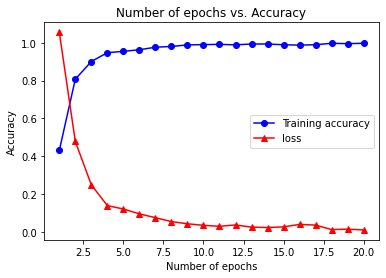

In [32]:
accuracy_train = history.history['accuracy']
accuracy_loss = history.history['loss']
epochs_ = range(1, n_train_epoch + 1)

# 정확도 그래프 플로팅
plt.plot(epochs_, accuracy_train, label='Training accuracy', color='blue', marker='o')
plt.plot(epochs_, accuracy_loss, label='loss', color='red', marker='^')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Number of epochs vs. Accuracy')
plt.legend()
plt.show()

In [36]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2) 
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')


36/36 - 1s - loss: 3.6784 - accuracy: 0.3786
test_loss: 3.678389072418213
test_accuracy: 0.3786407709121704


In [33]:
predicted_result = model.predict(x_test_norm)
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 :', predicted_labels[idx])
print('실제 데이터의 라벨:', y_test[idx])

model.predict() 결과 :  [1.7275187e-06 5.4208612e-01 4.5791218e-01]
model이 추론한 가장 가능성이 높은 결과 : 1
실제 데이터의 라벨: 0


In [38]:
predicted_result

array([[1.7275187e-06, 5.4208612e-01, 4.5791218e-01],
       [8.1576908e-01, 8.4424049e-02, 9.9806905e-02],
       [7.6715000e-02, 8.4430259e-01, 7.8982390e-02],
       ...,
       [1.3789385e-04, 6.5623522e-02, 9.3423861e-01],
       [9.8540735e-01, 1.4592084e-02, 5.6360648e-07],
       [5.2183113e-06, 5.0020106e-02, 9.4997466e-01]], dtype=float32)

In [42]:
import pandas as pd

In [46]:
pd.Series(predicted_labels).value_counts()

1    549
0    317
2    267
dtype: int64

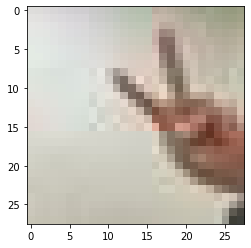

In [34]:
plt.imshow(x_test[idx], cmap=plt.cm.binary)
plt.show()

예측확률분포: [1.6178311e-04 6.5766108e-01 3.4217709e-01]
라벨: 2, 예측결과: 1


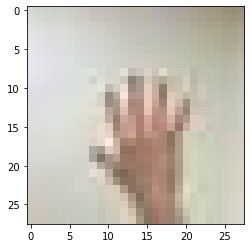

예측확률분포: [9.9899822e-01 9.8717737e-04 1.4625447e-05]
라벨: 1, 예측결과: 0


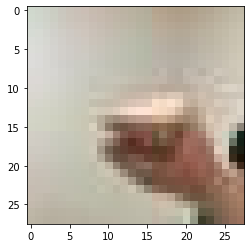

예측확률분포: [2.0897803e-06 9.8857540e-01 1.1422509e-02]
라벨: 2, 예측결과: 1


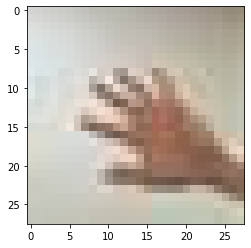

예측확률분포: [0.00383973 0.85351664 0.14264368]
라벨: 0, 예측결과: 1


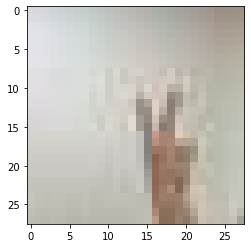

예측확률분포: [4.4953698e-01 5.5046284e-01 2.2360483e-07]
라벨: 2, 예측결과: 1


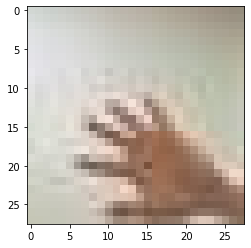

In [35]:
import random

wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### 회고
- 이미지 학습을 진행하는데 재미가 있었다.
- 각각 이미지를 촬영을 하고 학습데이터로 사용을 하는게 재미있었다.
- 꽤 많은 이미지를 학습했다고 했는데 생각보다 정확도가 낮아서 아쉽다.
- 추후에 이미지 augumet를 해서 진행을 해보아야겠다.
- 이미지 반전 및 회전을 해서 이미지를 더 늘려보아야겠다.